In [1]:
# Load the "autoreload" extension so that code can change
%load_ext autoreload

# Always reload modules so that as you change code in src, it gets loaded
%autoreload 2

In [ ]:
from src.models.lstm_seq import LSTMSeqModel
import tensorflow as tf
from tensorflow.keras.utils import plot_model
# Used to get the graph
from tensorflow.python.keras import backend as K
import os
import src.data_transform.preprocessing as pp
import tensorflow_hub as hub

In [ ]:
from src.models import train_model

In [ ]:
specs = train_model.load_spec('../specs/exp00.yaml')

In [5]:
#Load dataset
data_dir ='../data/processed/social'
file_name = 'social.txt'
dataset = pp.load_from_txt(os.path.join(data_dir, file_name))
dataset, integer_encoder = pp.preprocess_data(dataset.take(64), **specs['tf_dataset_params'])

In [7]:
model = LSTMSeqModel(integer_encoder.tokens, **specs['model_params'])

### Visualize with plot model

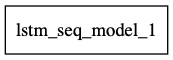

In [8]:
plot_model(model, show_shapes=True, to_file='full_model.png', expand_nested=True)

### Visualize with tensorboard
To visualize with tensorboard train the model for one batch of one epoch

In [9]:
logdir = '../models/logs/exp00'
if os.path.exists(logdir):
    !rm -r $logdir

In [10]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
callbacks = [tensorboard_callback]
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy)
model.fit(dataset, steps_per_epoch=1, epochs=1, callbacks=callbacks)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.




If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.




If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.




If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



Train for 1 steps
1/1 [==============================] - 9s 9s/step - loss: 5.5016


In [11]:
model.summary()

Model: "lstm_seq_model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
pre_trained_embedding_1 (Pre multiple                  0         
_________________________________________________________________
encoder (Encoder)            multiple                  839680    
_________________________________________________________________
decoder (Decoder)            multiple                  902388    
Total params: 1,742,068
Trainable params: 1,742,068
Non-trainable params: 0
_________________________________________________________________


### View model in tensorboard
Loads at: [localhost:6006](http://localhost:6006)


In [12]:
%load_ext tensorboard

In [13]:
%tensorboard --logdir $logdir